# Streamageddon
Spotify's armageddon investments and data science meet
## Preprocessing

In [ ]:
%pip install --quiet pandas==2.3.2 wordcloud==1.9.4

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df_csv = pd.read_csv("artists.csv")
df_json = pd.read_json("spotify-artists.json")
df_json_normalized = pd.json_normalize(df_json["artists"])

id = df_json_normalized["id"]
genres = df_json_normalized["genres"]
followers_total = df_json_normalized["followers.total"]
popularity = df_json_normalized["popularity"]
name = df_json_normalized["name"]
# First image of an artist
image = df_json_normalized["images"][0][0]["url"]
data = {"SpotifyId": id,
        "Genres": genres,
        "Followers": followers_total,
        "Popularity": popularity,
        "Image": image}

df_json_final = pd.DataFrame(data)
df = df_json_final.merge(df_csv, on='SpotifyId', how='inner')
df["Date"] = pd.to_datetime(df["Date"], format='%Y%m%d')
#print(df.head())

flat_genres = df.explode("Genres")
#print(flat_genres)

unique, counts = np.unique(flat_genres["Genres"], return_counts=True)
print(len(unique))
print(counts)

92
[ 3  5  1  1 20  1  2  6  3  1  1  2  2  1  1  2  1  1  2  1  3  2  2  1
  1 13  1  8 23  1  1  4  2  3  1  1  1  1  1  1  1  1  9  2  4  9  1  3
 11  3  3  2  1  2  2  1  2  1  1  2  6 11  1  1  2  5  1  1  2  1  3  2
  2  1  2  1  7  2 12  1  1  5  2  1  1  4  2  1  4  1  4  1]


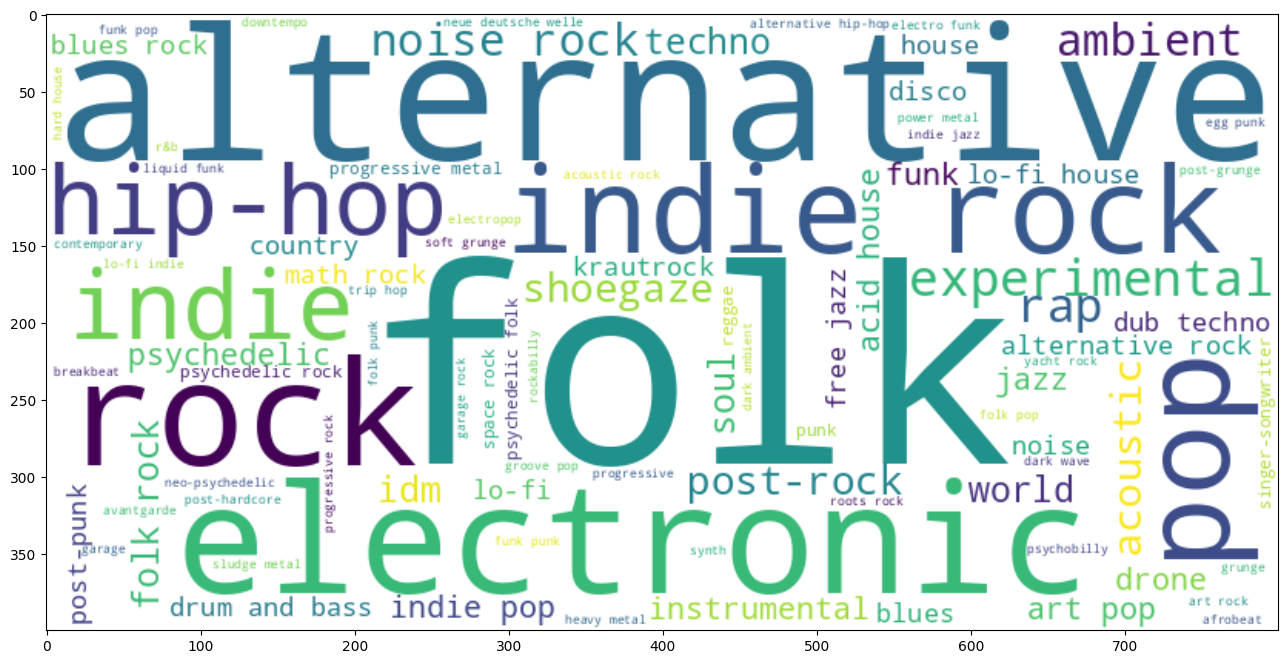

In [13]:
genres_dict = {}
for i in range(len(unique)):
    genres_dict[unique[i]] = counts[i]

wc = WordCloud(width=800, height=400, background_color="white")

wc.generate_from_frequencies(genres_dict)

plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

         Genres  Count
0          folk     23
1   alternative     20
2    electronic     13
3          rock     12
4    indie rock     11
5           pop     11
6       hip-hop      9
7         indie      9
8  experimental      8
9           rap      7


<BarContainer object of 10 artists>

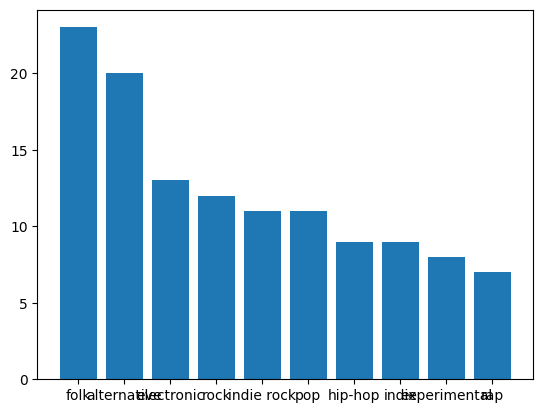

In [30]:
topten = sorted(genres_dict, key=genres_dict.get, reverse=True)[:10]
counts2 = np.asarray(sorted(counts, reverse=True)[:10])

topten_df = pd.DataFrame({'Genres': topten, 'Count': counts2.astype(int)})

print(topten_df)
plt.bar(topten_df['Genres'], topten_df['Count'])

In [33]:
avg_popularity = df['Popularity'].mean()
avg_followers = df['Followers'].mean()

print(f"Mean popularity: {avg_popularity}")
print(f"Mean followers: {avg_followers}")

med_popularity = df['Popularity'].median()
med_followers = df['Followers'].median()

print(f"Median popularity: {med_popularity}")
print(f"Median followers: {med_followers}")

Mean popularity: 10.038461538461538
Mean followers: 67606.09615384616
Median popularity: 1.0
Median followers: 550.0
